In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
metaverse_df = pd.read_csv('metaverse_transactions_dataset.csv')
print("Shape of the dataset:", metaverse_df.shape)
metaverse_df.head(5)

Shape of the dataset: (78600, 14)


,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [37]:
print("Number of null values in the dataset:\n", metaverse_df.isnull().sum())
print("\n\nUnderstanding the numerical distribution of the numerical variables:\n", metaverse_df.describe())
print("\n\nUnderstanding the datatypes that are inferred by pandas:\n")
metaverse_df.info()

Number of null values in the dataset:
 timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64


Understanding the numerical distribution of the numerical variables:
         hour_of_day        amount     ip_prefix  login_frequency  \
count  78600.000000  78600.000000  78600.000000     78600.000000   
mean      11.532634    502.574903    147.644430         4.178702   
std        6.935897    245.898146     69.388143         2.366038   
min        0.000000      0.010000     10.000000         1.000000   
25%        6.000000    331.319966    172.000000         2.000000   
50%       12.000000    500.029500    172.160000         4.000000   
75%       18.000000    669.528311    192.000000         6.000000   
max       

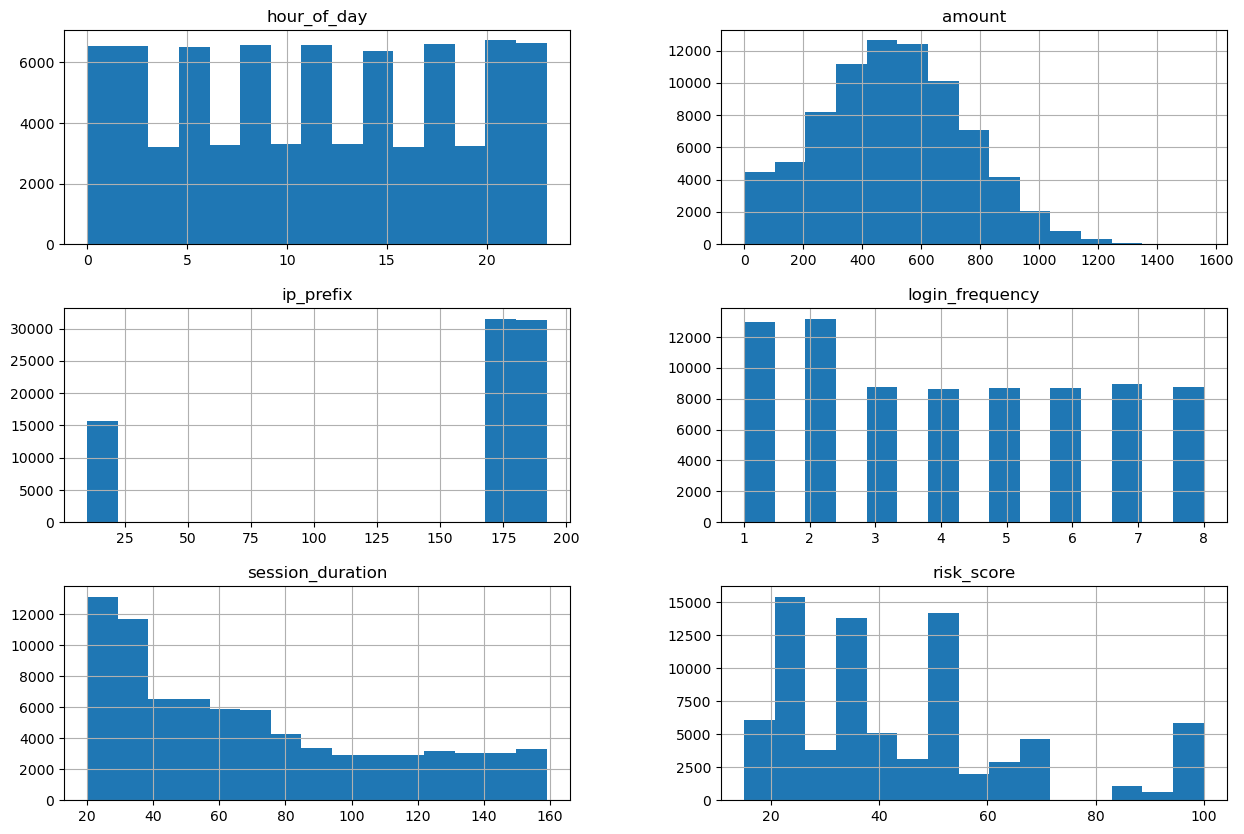

In [15]:
metaverse_df.hist(bins=15, figsize=(15, 10))
plt.show()

##Observations:

Given the above we can conclude that only Amount, Risk Score and session duration are actually continuous variables in this dataset. ip_prefix/login/hour_of_day despite being numeric in nature are actually discrete with a defined set of values.

In [35]:
discrete_nums = ['ip_prefix','login_frequency','hour_of_day']
for col in discrete_nums:
    print(metaverse_df[col].value_counts())

ip_prefix
172.160    15911
10.000     15715
192.168    15693
172.000    15659
192.000    15622
Name: count, dtype: int64
login_frequency
2    13195
1    12950
7     8933
8     8784
3     8743
6     8705
5     8684
4     8606
Name: count, dtype: int64
hour_of_day
20    3404
17    3377
8     3324
0     3323
21    3318
22    3318
23    3311
11    3299
13    3299
10    3298
5     3283
12    3282
2     3273
7     3258
3     3256
19    3255
18    3241
9     3241
1     3229
6     3219
4     3209
16    3205
14    3199
15    3179
Name: count, dtype: int64


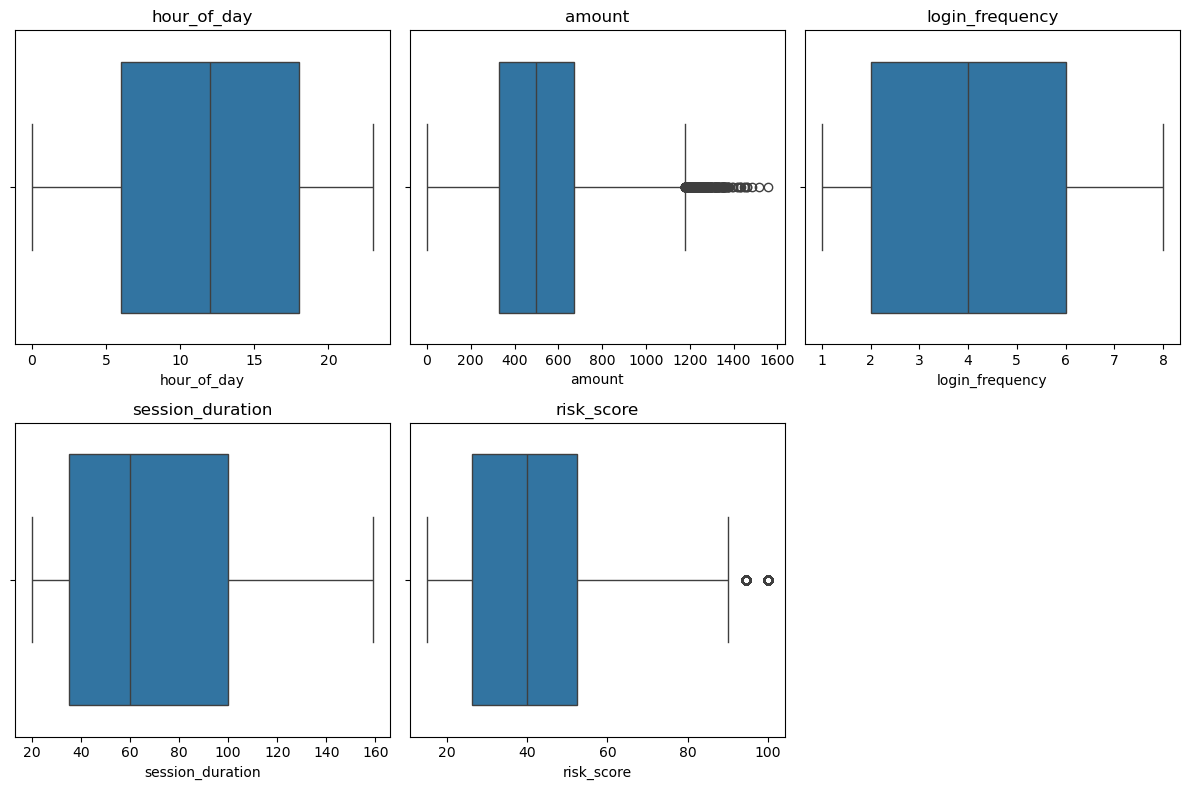

In [29]:
plt.figure(figsize=(12, 8))

# Select the numeric columns
numeric_columns = list(metaverse_df.select_dtypes(include=['float64', 'int64']).columns)
numeric_columns.remove('ip_prefix')
num_plots = len(numeric_columns)
rows = 2
cols = 3

# Create subplots in a 2x3 arrangement
for i, column in enumerate(numeric_columns):
    plt.subplot(rows, cols, i + 1)  # Create a subplot for each column
    sns.boxplot(x=metaverse_df[column])
    plt.title(column)  # Title with the name of the column

plt.tight_layout()  # Adjust subplots to fit into the figure area nicely
plt.show()

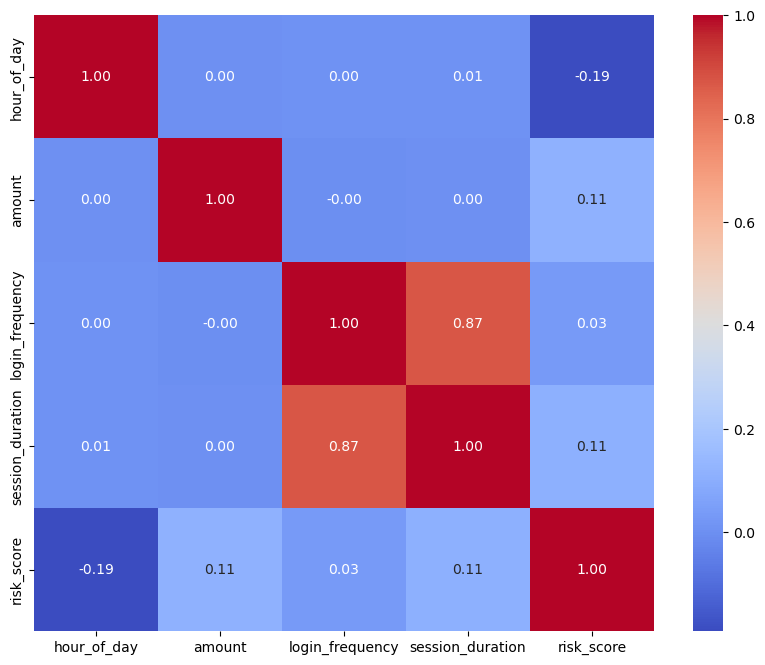

In [31]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(metaverse_df[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()